# 📊 YouTube Channel Analytics Dashboard

**Description:**  
This notebook analyzes YouTube video performance using metrics like views, likes, dislikes, and comments.

**Dataset:**  
Contains: `VideoID, Title, UploadDate, Views, Likes, Dislikes, Comments`  
Total records: 1200+ (Indian YouTube video data — synthetic)

**Goals:**
- Line chart: Views over time
- Bar chart: Views per video
- Pie chart: Engagement breakdown (likes, dislikes, comments)


In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Step 2: Load the CSV file
# Load dataset
df = pd.read_csv('youtube_data.csv')

# Preview
df.head()

,VideoID,Title,UploadDate,Views,Likes,Dislikes,Comments
0,VID00000,A Day in Mumbai #427,2020-10-19,1786130,50183,2988,33059
1,VID00001,South Indian Breakfast Recipes #313,2023-04-03,1883076,185339,19739,45142
2,VID00002,Top 10 Indian Street Foods #498,2020-03-25,118655,2749,348,1523
3,VID00003,IPL 2025 Final Highlights #401,2023-05-06,93547,9197,1249,2207
4,VID00004,UPSC Preparation Tips #288,2024-03-25,1177642,115688,22499,8791


In [3]:
# Step 3: Data Cleaning and Preprocessing

# Convert 'UploadDate' to datetime
df['UploadDate'] = pd.to_datetime(df['UploadDate'])

# Sort by UploadDate
df = df.sort_values('UploadDate')

# Check for missing values
df.isnull().sum()

VideoID       0
Title         0
UploadDate    0
Views         0
Likes         0
Dislikes      0
Comments      0
dtype: int64

### Views Over Time

This line chart shows how video views have changed over time.  
I'll group views by upload date and sum them.

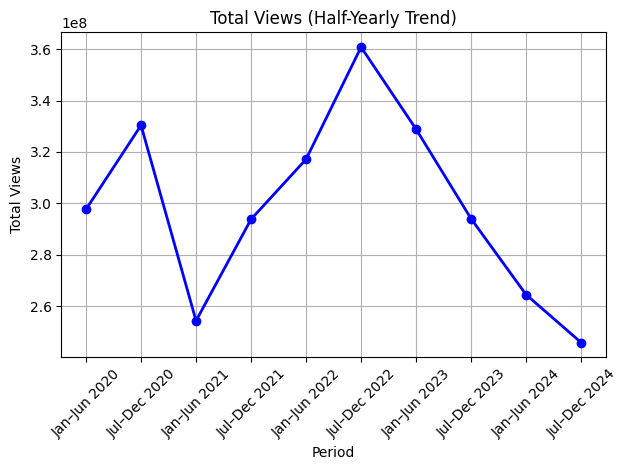

In [16]:
import matplotlib.pyplot as plt

# Step 1: Create Half-Year Period Labels
def get_half_year_label(date):
    year = date.year
    if date.month <= 6:
        return f"Jan–Jun {year}"
    else:
        return f"Jul–Dec {year}"

df['HalfYear'] = df['UploadDate'].apply(get_half_year_label)

# Step 2: Group by Half-Year and sum views
views_half_year = df.groupby('HalfYear')['Views'].sum().reset_index()

# Step 3: Sort periods chronologically
# We'll map half-year labels back to datetime for sorting
def label_to_sort_key(label):
    parts = label.split()
    month_part = parts[0]
    year = int(parts[1])
    month = 1 if month_part.startswith('Jan') else 7
    return pd.Timestamp(year=year, month=month, day=1)

views_half_year['SortKey'] = views_half_year['HalfYear'].apply(label_to_sort_key)
views_half_year = views_half_year.sort_values('SortKey')

# Step 4: Plot
plt.plot(views_half_year['HalfYear'], views_half_year['Views'], marker='o', color='blue', linewidth=2)
plt.xticks(rotation=45)
plt.title("Total Views (Half-Yearly Trend)")
plt.xlabel("Period")
plt.ylabel("Total Views")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# 📋 Display Half-Yearly Views Table

views_half_year_table = views_half_year[['HalfYear', 'Views']].reset_index(drop=True)
views_half_year_table.columns = ['Period', 'Total Views']  # Rename columns for presentation

# For Colab display
from IPython.display import display
display(views_half_year_table)


,Period,Total Views
0,Jan–Jun 2020,297689585
1,Jul–Dec 2020,330380327
2,Jan–Jun 2021,254309982
3,Jul–Dec 2021,293817586
4,Jan–Jun 2022,317178005
5,Jul–Dec 2022,360819093
6,Jan–Jun 2023,328879646
7,Jul–Dec 2023,294018510
8,Jan–Jun 2024,264470399
9,Jul–Dec 2024,245855871


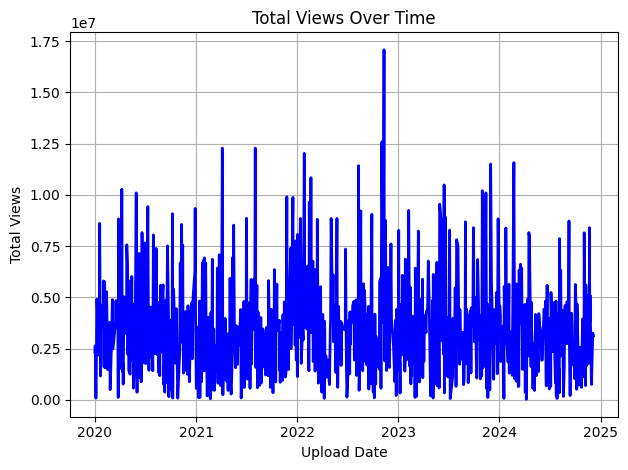

In [4]:
# Grouping views by date
views_over_time = df.groupby('UploadDate')['Views'].sum()

# Plot
plt.plot(views_over_time.index, views_over_time.values, color='blue', linewidth=2)
plt.title('Total Views Over Time')
plt.xlabel('Upload Date')
plt.ylabel('Total Views')
plt.grid(True)
plt.tight_layout()
plt.show()

### Views Per Video

This bar chart displays the top 20 videos with the highest views.  
Useful for identifying viral content.

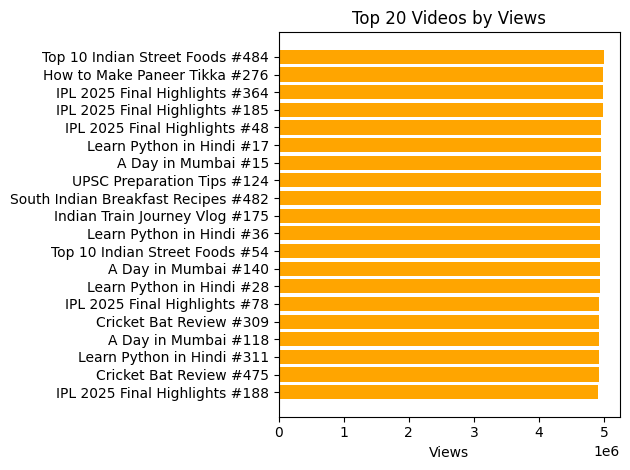

In [5]:
# Top 20 videos by views
top_videos = df.sort_values('Views', ascending=False).head(20)

# Bar plot
plt.barh(top_videos['Title'], top_videos['Views'], color='orange')
plt.title('Top 20 Videos by Views')
plt.xlabel('Views')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

In [18]:
# 📋 Top 10 Videos by Views (Table Format)

top_10_videos = df.sort_values('Views', ascending=False).head(10)[['Title', 'Views', 'UploadDate']]
top_10_videos.reset_index(drop=True, inplace=True)

# Rename columns for clarity
top_10_videos.columns = ['Video Title', 'Total Views', 'Upload Date']

# Display in Colab
from IPython.display import display
display(top_10_videos)

,Video Title,Total Views,Upload Date
0,Top 10 Indian Street Foods #484,4994780,2020-05-11
1,How to Make Paneer Tikka #276,4986104,2024-11-02
2,IPL 2025 Final Highlights #364,4985618,2022-01-12
3,IPL 2025 Final Highlights #185,4976014,2022-11-02
4,IPL 2025 Final Highlights #48,4957334,2022-01-14
5,Learn Python in Hindi #17,4957272,2024-09-08
6,A Day in Mumbai #15,4955981,2022-10-25
7,UPSC Preparation Tips #124,4952708,2020-11-03
8,South Indian Breakfast Recipes #482,4951012,2020-12-29
9,Indian Train Journey Vlog #175,4943497,2021-03-30


### Engagement Breakdown (Pie Chart)

This pie chart shows the proportion of:
- Likes
- Dislikes
- Comments

Aggregated across all videos.

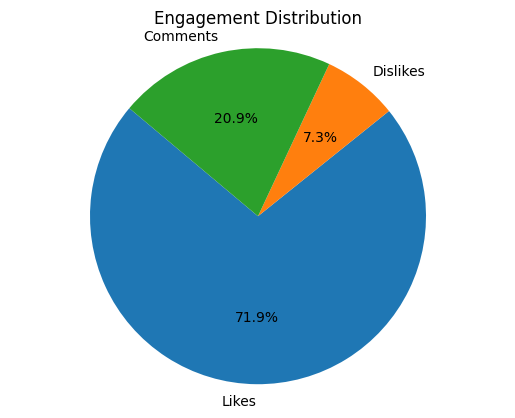

In [6]:
# Total engagement metrics
likes = df['Likes'].sum()
dislikes = df['Dislikes'].sum()
comments = df['Comments'].sum()

# Pie chart
labels = ['Likes', 'Dislikes', 'Comments']
values = [likes, dislikes, comments]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Engagement Distribution')
plt.axis('equal')
plt.show()

## Summary

- **Views over time** shows content performance trends (e.g. spikes, dips).
- **Top viewed videos** help identify successful content strategies.
- **Engagement pie** highlights audience interaction — likes dominate, but comments also contribute meaningfully.

This dashboard provides a quick visual summary to help creators improve future content.